In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Research

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
train['Survived'].mean()

0.3838383838383838

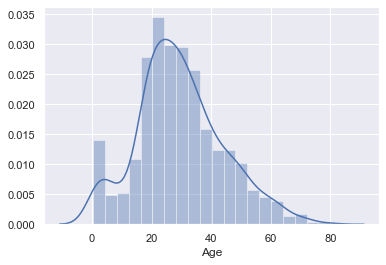

In [5]:
sns.distplot(train['Age'].dropna())

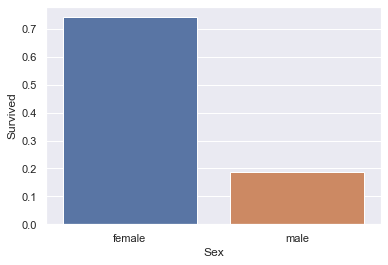

In [6]:
mf_dat = pd.DataFrame(train.groupby('Sex')['Survived'].mean()).reset_index()
sns.barplot(x='Sex',y='Survived',data=mf_dat)

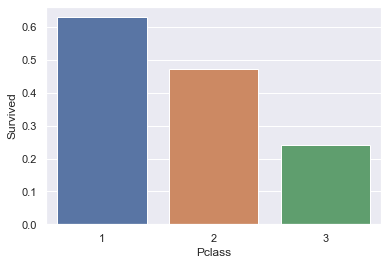

In [7]:
class_dat = pd.DataFrame(train.groupby('Pclass')['Survived'].mean()).reset_index()
sns.barplot(x='Pclass',y='Survived',data=class_dat)

## Modeling

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
y_col = 'Survived'
X_cols = ['Pclass','Sex_Code','Age']

In [11]:
def sex_code(x):
    if x == 'male':
        return 0
    else:
        return 1

train['Sex_Code'] = train['Sex'].apply(sex_code)

In [12]:
train.dropna(subset=X_cols,inplace=True)

In [13]:
train[X_cols].head()

,Pclass,Sex_Code,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [14]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [15]:
model = clf.fit(train[X_cols], train[y_col])

## Evaluate Model

In [16]:
test_survived = pd.read_csv('gender_submission.csv')
test_survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
test = test.merge(test_survived, on='PassengerId', how='left')

In [22]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Sex_Code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1


In [23]:
test.dropna(subset=X_cols,inplace=True)

In [20]:
test['Sex_Code'] = test['Sex'].apply(sex_code)

In [24]:
clf.score(test[X_cols], test[y_col])

0.9126506024096386